增强的详细参数参考[这里](https://github.com/aleju/imgaug#documentation)

In [1]:
#encoding: utf-8
import os
import imageio
import numpy as np
import imgaug as ia
from imgaug import augmenters as iaa
%matplotlib inline
#dir(ia)

Augmented: <class 'list'>


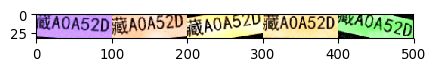

In [2]:
seq = iaa.Sequential([
    iaa.Affine(rotate=(-13, 13)),
    iaa.AdditiveGaussianNoise(scale=(0, 30)),
    iaa.Crop(percent=(0, 0.05)),
    iaa.AddToHueAndSaturation((-20, 20)), # change hue and saturation
                # either change the brightness of the whole image (sometimes
                # per channel) or change the brightness of subareas
    iaa.OneOf([iaa.Multiply((0.5, 1.5), per_channel=0.5),
                iaa.FrequencyNoiseAlpha(exponent=(-4, 0),
                        first=iaa.Multiply((0.5, 1.5), per_channel=True),
                        second=iaa.LinearContrast((0.5, 2.0)))]),
])
img_path = "data\\藏A0A52D.jpg"
img_name = os.path.basename(img_path)

image = imageio.imread(img_path)
images=[image] * 5

images_aug_seq = seq.augment_images(images)

print("Augmented:",type(images_aug_seq))
ia.imshow(np.hstack(images_aug_seq))
for idx, img in enumerate(images_aug_seq):
    dst_name = (str(idx) + '_' + os.path.basename(img_path))
#     ia.cv2.imwrite(dst_name, img)
    ia.cv2.imencode('.jpg', img[:,:,::-1])[1].tofile(dst_name)  #中文路径